1.6944935549283284
-10.266459539028972


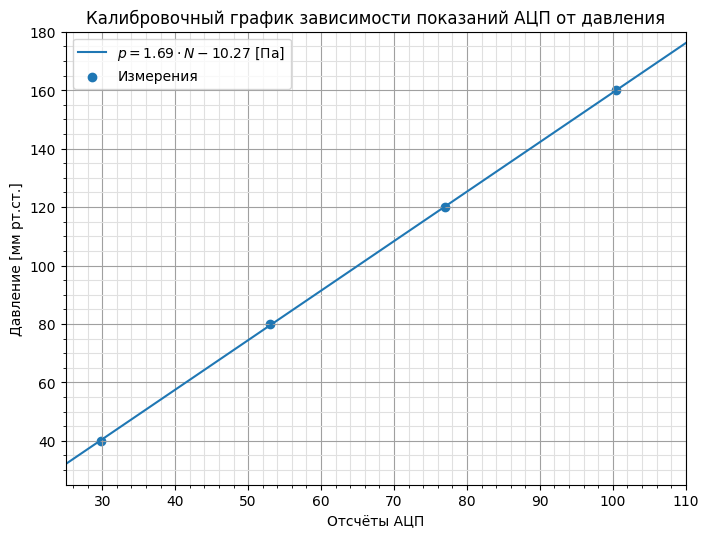

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read(file):
  data = []
  with open(file, 'r') as file:
    for line in file.readlines():
      data.append(float(line))
  return np.array(data)

def aver(data):
  return np.sum(data) / np.size(data) 

mmHg_40 = read('40 mmHg.txt')
mmHg_80 = read('80 mmHg.txt')
mmHg_120 = read('120 mmHg.txt')
mmHg_160 = read('160 mmHg.txt')

calib_count_arr = np.array([aver(mmHg_40), aver(mmHg_80), 
                      aver(mmHg_120), aver(mmHg_160)])
calib_press_arr = np.array([40, 80, 120, 160]) 

def a(m):
  return np.sum(m) / np.size(m)

u = calib_press_arr
v = calib_count_arr

k = (a(v * u) - a(v) * a(u)) / (a(v**2) - a(v)**2)
b = a(u) - k * a(v)

print(k)
print(b)

calib_coef = k

plt.figure(figsize=(8,6), dpi=100)
plt.title('Калибровочный график зависимости показаний АЦП от давления')
plt.xlim(25, 110)
plt.ylim(25, 180)
plt.ylabel("Давление [мм рт.ст.]") 
plt.xlabel("Отсчёты АЦП")
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0') 
plt.scatter(calib_count_arr, calib_press_arr, label = 'Измерения')
plt.plot(np.linspace(20, 115, 100), k * np.linspace(20, 115, 100) + b, label = '$p = 1.69 \cdot N - 10.27$ [Па]')
plt.legend()
plt.savefig('kalib.png')

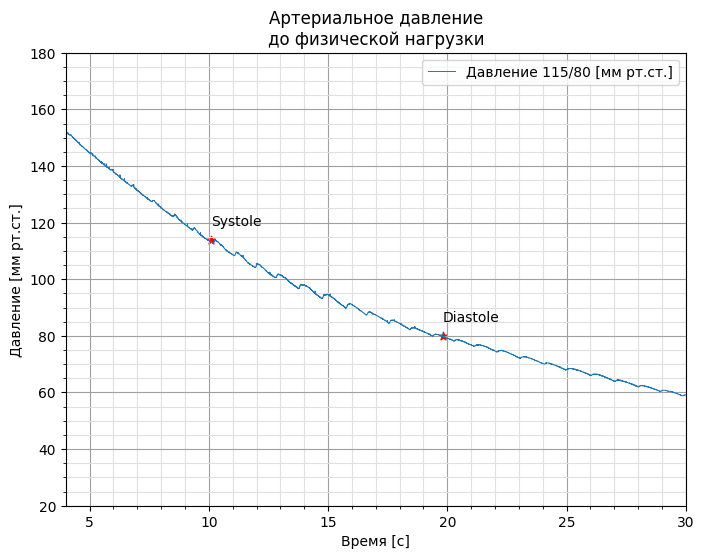

In [ ]:
rest = read('rest.txt') 
time_rest = np.linspace(0, 60, np.size(rest))
rest *= calib_coef 

plt.figure(figsize=(8,6), dpi=100)
plt.title('Артериальное давление\nдо физической нагрузки')
plt.xlim(4, 30)
plt.ylim(20, 180)
plt.ylabel("Давление [мм рт.ст.]") 
plt.xlabel("Время [с]")
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0') 

plt.plot(time_rest, rest, linewidth = 0.7, label = 'Давление 115/80 [мм рт.ст.]')
plt.scatter([10.1], [114], marker = '*', color = 'red')
plt.text(10.1, 114 + 5, 'Systole')
plt.scatter([19.8], [80], marker = '*', color = 'red')
plt.text(19.8, 80 + 5, 'Diastole')
plt.legend()
plt.savefig('rest.png')

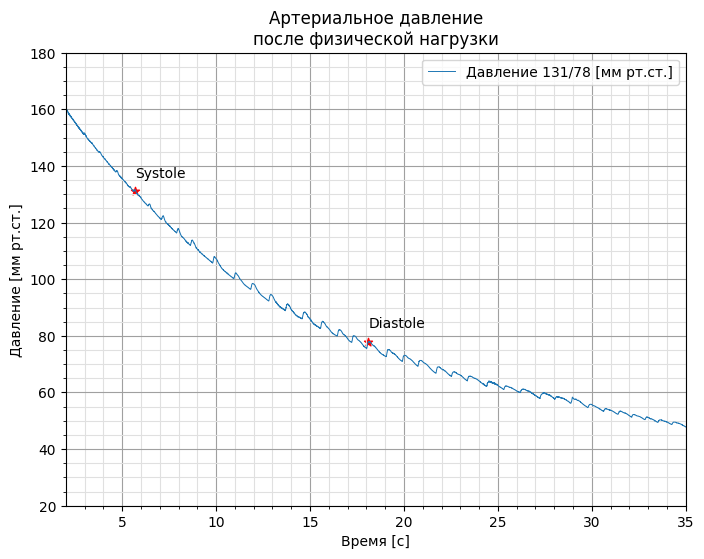

In [ ]:
fitness = read('fitness.txt') 
time_fitness = np.linspace(0, 60, np.size(fitness))
fitness *= calib_coef 

plt.figure(figsize=(8,6), dpi=100)
plt.title('Артериальное давление\nпосле физической нагрузки')
plt.xlim(2, 35)
plt.ylim(20, 180)
plt.ylabel("Давление [мм рт.ст.]") 
plt.xlabel("Время [с]")
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0') 

plt.plot(time_fitness, fitness, linewidth = 0.7, label = 'Давление 131/78 [мм рт.ст.]')
plt.scatter([5.7], [131], marker = '*', color = 'red')
plt.text(5.7, 131 + 5, 'Systole')
plt.scatter([18.1], [78], marker = '*', color = 'red')
plt.text(18.1, 78 + 5, 'Diastole')
plt.legend()
plt.savefig('fitness.png')

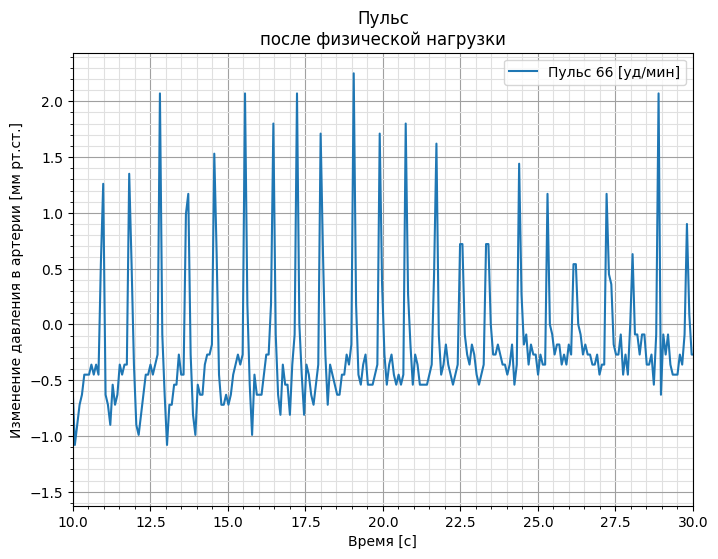

<Figure size 432x288 with 0 Axes>

In [ ]:
step_pulse = fitness[::40]
time_pulse = time_fitness[::40]
pulse = [step_pulse[i] - step_pulse[i - 1] for i in range(1, len(step_pulse))]
plt.figure(figsize=(8,6), dpi=100)
plt.title('Пульс\nпосле физической нагрузки')
plt.ylabel("Изменение давления в артерии [мм рт.ст.]") 
plt.xlabel("Время [с]")
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0')
plt.xlim(10, 30)
plt.plot(time_pulse[:-1], pulse, label = 'Пульс 66 [уд/мин]')
plt.legend()
plt.show()
plt.savefig('pulse_fitness.png')

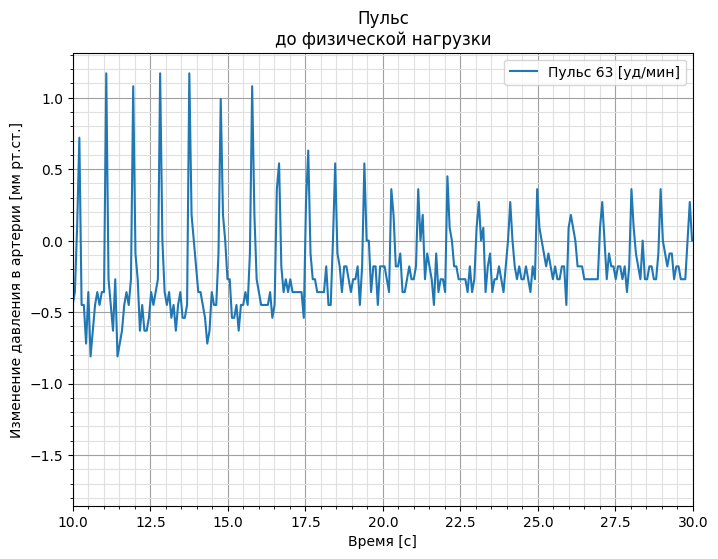

In [ ]:
step_pulse = rest[::40]
time_pulse = time_rest[::40]
pulse = [step_pulse[i] - step_pulse[i - 1] for i in range(1, len(step_pulse))]
plt.figure(figsize=(8,6), dpi=100)
plt.title('Пульс\nдо физической нагрузки')
plt.ylabel("Изменение давления в артерии [мм рт.ст.]") 
plt.xlabel("Время [с]")
plt.grid(which = 'major', color = '#A0A0A0')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#E0E0E0')
plt.xlim(10, 30)
plt.plot(time_pulse[:-1], pulse, label = 'Пульс 63 [уд/мин]')
plt.legend()
plt.savefig('pulse_rest.png')